In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [141]:
dataframe = pd.read_csv('bank.csv',sep=";")

In [142]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [143]:
dataframe.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [144]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [145]:
dataframe = dataframe.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome'], axis=1)

In [146]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [147]:
dataframe.nunique()

age           67
job           12
default        2
balance     2353
loan           2
duration     875
campaign      32
pdays        292
previous      24
y              2
dtype: int64

In [148]:
# dataframe.default.replace(['yes','no'],[1,0],inplace=True)

In [149]:
# dataframe['default','y','loan']=dataframe['default','y','loan'].replace(['yes','no'],[1,0],inplace=True)
dataframe.replace(['yes','no'],[1,0],inplace=True)

In [150]:
dataframe.head()

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
0,30,unemployed,0,1787,0,79,1,-1,0,0
1,33,services,0,4789,1,220,1,339,4,0
2,35,management,0,1350,0,185,1,330,1,0
3,30,management,0,1476,1,199,4,-1,0,0
4,59,blue-collar,0,0,0,226,1,-1,0,0


In [151]:
dataframe.shape

(4521, 10)

In [152]:
dataframe = pd.get_dummies(dataframe)

In [153]:
dataframe.shape

(4521, 21)

In [154]:
dataframe.head()

,age,default,balance,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,79,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,220,1,339,4,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,0,185,1,330,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,199,4,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59,0,0,0,226,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe,dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

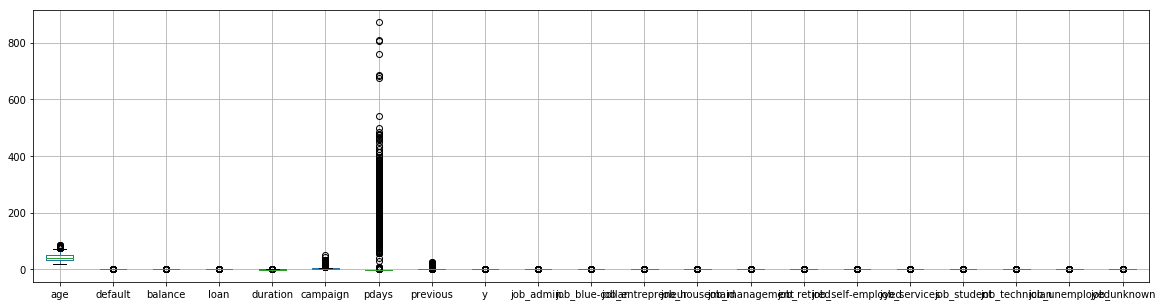

In [139]:
dataframe.boxplot(figsize=(20,5))

In [156]:
column = ['age','balance','duration','campaign','pdays','previous']
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

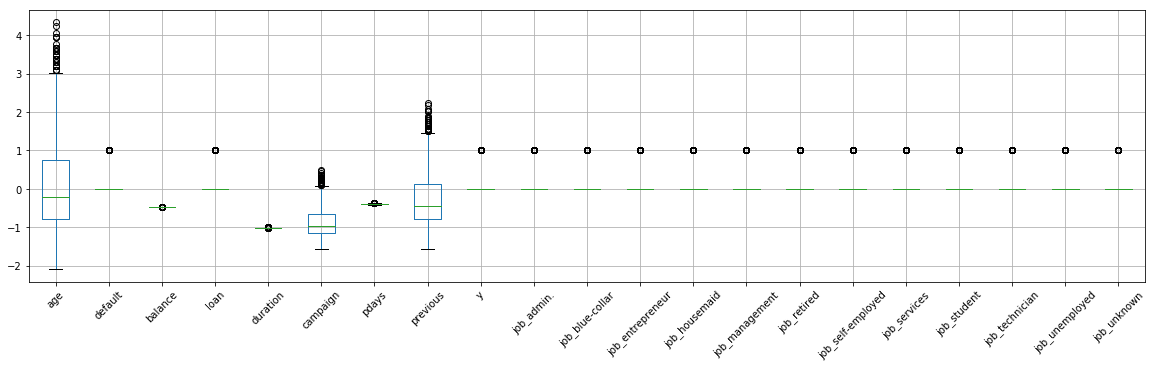

In [158]:
dataframe.boxplot(figsize=(20,5),rot=45,)

In [161]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,-1.116976e-16,1.000000,-2.096223,-0.772497,-0.205186,0.740332,4.333301
default,4521.0,1.681044e-02,0.128575,0.000000,0.000000,0.000000,0.000000,1.000000
balance,4521.0,-4.727006e-01,0.000332,-0.473397,-0.472957,-0.472769,-0.472455,-0.471261
loan,4521.0,1.528423e-01,0.359875,0.000000,0.000000,0.000000,0.000000,1.000000
duration,4521.0,-1.015796e+00,0.003848,-1.023863,-1.018769,-1.016585,-1.012947,-0.999120
campaign,4521.0,-8.983291e-01,0.321563,-1.572398,-1.146736,-0.964310,-0.660265,0.495102
pdays,4521.0,-3.971854e-01,0.009988,-0.418122,-0.404901,-0.399235,-0.389791,-0.353905
previous,4521.0,-3.203774e-01,0.590471,-1.558137,-0.776515,-0.441534,0.116767,2.238313
y,4521.0,1.152400e-01,0.319347,0.000000,0.000000,0.000000,0.000000,1.000000
job_admin.,4521.0,1.057288e-01,0.307524,0.000000,0.000000,0.000000,0.000000,1.000000


In [166]:
def split(dataframe):
    test_data = dataframe.tail(1000).reset_index(drop=True)
    return dataframe.head(len(dataframe)-1000), test_data

In [167]:
dataframe, test_data = split(dataframe)

In [168]:
dataframe.describe()

,age,default,balance,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
count,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,...,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000
mean,-0.000535,0.016189,-0.472701,0.157058,-1.015798,-0.898501,-0.397191,-0.320693,0.114172,0.106220,...,0.038341,0.023573,0.217836,0.049986,0.040897,0.090315,0.019313,0.168986,0.028685,0.007668
std,1.005127,0.126218,0.000334,0.363907,0.003868,0.323212,0.010039,0.593499,0.318065,0.308163,...,0.192046,0.151736,0.412834,0.217947,0.198081,0.286674,0.137641,0.374793,0.166943,0.087245
min,-2.096223,0.000000,-0.473397,0.000000,-1.023863,-1.572398,-0.418122,-1.558137,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.772497,0.000000,-0.472957,0.000000,-1.018769,-1.146736,-0.404901,-0.776515,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.205186,0.000000,-0.472769,0.000000,-1.016585,-0.964310,-0.399235,-0.441534,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.740332,0.000000,-0.472455,0.000000,-1.012947,-0.660265,-0.389791,0.116767,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.333301,1.000000,-0.471261,1.000000,-0.999120,0.495102,-0.353905,2.238313,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [285]:
def KNN_Algo(dataframe,test_data):
    # stores the num rows in test data
    test_size = test_data.shape[0]
    # stores the num rows in dataframe
    data_size = dataframe.shape[0]
    # storing original outputs
    original_outputs = test_data('y')
    # storing the outputs of dataframe
    data_outputs = dataframe['y']
    # deleting the outputs from dataframe for computing
    dataframe = dataframe.drop('y',axis=1)
    #deleting the output rows as we'll be compuing on the basis of other rows
    test_data = test_data.drop('y', axis=1)
    predicted_outputs = np.zeros(test_size)
    Eucledian_dist = pd.DataFrame(columns=['dist','y'])
    k = 5
    for counter1 in range(0,test_size):
        df = pd.DataFrame(columns=COLUMN_NAMES)
        for counter2 in range(0,data_size):
            Eucledian_dist.loc[counter2,'dist'] = np.sum(np.square(
                                                  np.subtract(
                                                      test_size.iloc[counter1,:],dataframe.iloc[counter2,:]
                                                  )
                                                )
                                             )
        Eucledian_dist.y[counter2] = original_outputs[counter2]
        Eucledian_dist = np.sqrt(Eucledian_dist)
        Eucledian_dist = np.sort(Eucledian_dist)
        # If the sum of top k elements are 
        if((Eucledian_dist.y[:k+1]==1).sum() >(k/2)):
            predicted_outputs[counter1] = 1
        else: 
            predicted_outputs[counter1] = 0

    similars = (original_outputs[:]==predicted_outputs[:]).sum()
    accuracy  = similars/test_size
    print(accuracy)

SyntaxError: invalid syntax (<ipython-input-285-b1ecd5651f04>, line 10)

In [180]:
dataframe=dataframe.describe().T.loc[:,['min', 'max','std']].head(3)

In [184]:
KNN_Algo(dataframe,test_data)

In [244]:
dist = pd.DataFrame(columns=['dist','y'])

In [279]:
(dist.dist[:]==1).sum() 

3

In [283]:
dist = dist.drop('y',axis=1)

In [284]:
dist

,dist
0,9
1,2
3,1
4,1
5,1


In [221]:
# (dataframe['min'][:]==dataframe['min'][:]).sum()

3

In [213]:
# ((dataframe.iloc[0,]==1).sum())

2

NameError: name 'Eucledian_dist' is not defined